In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
import init; init.init(force_download=False); 
from IPython.display import Image

replicating local resources


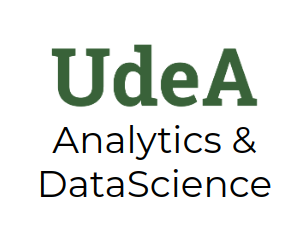

In [ ]:
Image("local/imgs/udea-datascience.png")

**Desarrollado por:** Javier Fernando Botía Valderrama

*Docente del Departamento de Ingeniería de Sistemas*

**Materia:** Estadística y Análisis Exploratorio

**Departamento:** Posgrado en Ingeniería

**Facultad de Ingeniería - Universidad de Antioquia**

#Estrategías para Obtener el Mejor Modelo de Regresión No Lineal

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import requests
import io

from sklearn.model_selection import train_test_split # Esta clase realiza la partición de datos en entrenamiento y prueba
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score # Método de validación cruzada para evaluar el desempeño un modelo
from sklearn.metrics import explained_variance_score # Se llama a una clase llamada explained_variance_score, el cual es
                                                     # una métrica de varianza explicada
from sklearn.metrics import mean_absolute_error # Se llama a una clase llamada mean_absolute_error, el cual es
                                                # una métrica de error promedio absoluto
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance # 0.001 (Sensibilidad del modelo regresión)
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV # Búsqueda de cuadrículas
from sklearn.preprocessing import PolynomialFeatures # Características Polinomiales

from sklearn.ensemble import VotingRegressor # Voto Mayoritario para Regresión
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
url = "https://raw.githubusercontent.com/javierfernandobotia/AnalisisAvanzadoDatos/main/Electrical.csv"
download = requests.get(url).content
data = pd.read_csv(io.StringIO(download.decode('utf-8')), sep=',',
                     decimal = ',')
# Es importante codificarlo a utf-8
display(data.head(20))

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.95906002455997,3.07988520422811,8.38102539191882,9.78075443222607,3.76308477206316,-0.782603630987543,-1.25739482958732,-1.7230863114883,0.650456460887227,0.859578105752345,0.887444920638513,0.958033987602737,0.0553474891727752,unstable
1,9.3040972346785,4.90252411201167,3.04754072762177,1.36935735529605,5.06781210427845,-1.94005842705193,-1.87274168559721,-1.25501199162931,0.41344056837935,0.862414076352903,0.562139050527675,0.781759910653126,-0.00595746432603695,stable
2,8.97170690932022,8.84842842134833,3.04647874898866,1.21451813833956,3.40515818001095,-1.20745559234302,-1.27721014673295,-0.92049244093498,0.163041039311334,0.766688656526962,0.839444015400588,0.109853244952427,0.00347087904838871,unstable
3,0.716414776295121,7.66959964406565,4.48664083058949,2.34056298396795,3.96379106326633,-1.02747330413905,-1.9389441526466,-0.997373606480681,0.446208906537321,0.976744082924302,0.929380522872661,0.36271777426931,0.028870543444887,unstable
4,3.13411155161342,7.60877161603408,4.94375930178099,9.85757326996638,3.52581081652096,-1.12553095451115,-1.84597485447561,-0.554305007534195,0.797109525792467,0.455449947148291,0.656946658473716,0.820923486481631,0.0498603734837059,unstable
5,6.99920870915215,9.10924671643764,3.7840659093988,4.26778760341917,4.42966882280625,-1.85713917685067,-0.670396827477973,-1.90213281847761,0.261792854117035,0.0779296721686504,0.542883858522323,0.469931041283024,-0.0173849069339299,stable
6,6.71016636762265,3.76520418352323,6.92931443867021,8.81856192345691,2.39741922937942,-0.614589561907959,-1.20882589139371,-0.574003776077751,0.177889561089242,0.397976580119618,0.402045952122677,0.376630279179848,0.0059535705684696,unstable
7,6.95351155782518,1.37912500228657,5.71940003020014,7.87030742603241,3.22449515790325,-0.748997751247627,-1.1865169283662,-1.28898047828942,0.371384852592056,0.633203555433068,0.732740894287254,0.380544478575059,0.0166342974538163,unstable
8,4.68985192749584,4.00774746209312,1.47857287590383,3.73378749230253,4.04129961368168,-1.41034431234687,-1.23820427574315,-1.39275102559166,0.269708270661235,0.250364217202032,0.164941118523114,0.482439411001001,-0.0386765836142913,stable
9,9.84149648830214,1.41382159178999,9.76985554870019,7.64161626330592,4.72759504201898,-1.99136336778711,-0.857637206946418,-1.87859446728545,0.376355980566834,0.544415315810004,0.792039424640656,0.116262822352385,0.0123834141734175,unstable


In [ ]:
data = data.iloc[:,:13].astype(float)
display(data)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789


In [ ]:
X = data[['tau1',	'tau2',	'tau3',	'tau4',	'p1',	'p2',	'p3',	'p4',	'g1',	'g2',	'g3',	'g4']] # Caracteriísticas
Y = data['stab'] # Salida

In [ ]:
MM = MinMaxScaler()
X_Norm = MM.fit_transform(X)

In [ ]:
X_Norm_Train, X_Norm_Test, Y_Train, Y_Test = train_test_split(X_Norm, Y, test_size = 0.25, train_size = 0.75, random_state = 17)
print("Tamaño de los Datos de Entrenamiento = ", X_Norm_Train.shape)
print("Tamaño de los Datos de Validación = ", X_Norm_Test.shape)
print("Tamaño del Vector de Clases de Entrenamiento = ", Y_Train.shape)
print("Tamaño del Vector de Clases de Prueba = ", Y_Test.shape)

Tamaño de los Datos de Entrenamiento =  (7500, 12)
Tamaño de los Datos de Validación =  (2500, 12)
Tamaño del Vector de Clases de Entrenamiento =  (7500,)
Tamaño del Vector de Clases de Prueba =  (2500,)


## Estrategía 1: Votación Mayoritaria para Modelos de Regresión No Lineal

In [ ]:
RF_1 = RandomForestRegressor(n_estimators = 200, criterion = 'absolute_error', max_depth = 7, min_samples_split=2, 
                           min_samples_leaf=1, bootstrap=True, n_jobs = 1, ccp_alpha=0.0)

In [ ]:
RF_2 = RandomForestRegressor(n_estimators = 150, criterion = 'squared_error', max_depth = 10, min_samples_split=2, 
                           min_samples_leaf=1, bootstrap=True, n_jobs = 1, ccp_alpha=0.0)

In [ ]:
ADA_1 = AdaBoostRegressor(n_estimators = 100, learning_rate = 1.0, loss='linear')

In [ ]:
ADA_2 = AdaBoostRegressor(n_estimators = 50, learning_rate = 0.5, loss='exponential')

In [ ]:
Votacion = VotingRegressor(estimators=[('Random Forest 1', RF_1), ('Random Forest 2', RF_2), 
                                      ('AdaBoost 1', ADA_1), ('AdaBoost 2', ADA_2)], weights = [0.3, 0.2, 0.25, 0.25])
Votacion.fit(X_Norm_Train, Y_Train)

VotingRegressor(estimators=[('Random Forest 1',
                             RandomForestRegressor(criterion='absolute_error',
                                                   max_depth=7,
                                                   n_estimators=200,
                                                   n_jobs=1)),
                            ('Random Forest 2',
                             RandomForestRegressor(max_depth=10,
                                                   n_estimators=150,
                                                   n_jobs=1)),
                            ('AdaBoost 1', AdaBoostRegressor(n_estimators=100)),
                            ('AdaBoost 2',
                             AdaBoostRegressor(learning_rate=0.5,
                                               loss='exponential'))],
                weights=[0.3, 0.2, 0.25, 0.25])

In [ ]:
Y_pred = Votacion.predict(X_Norm_Test)

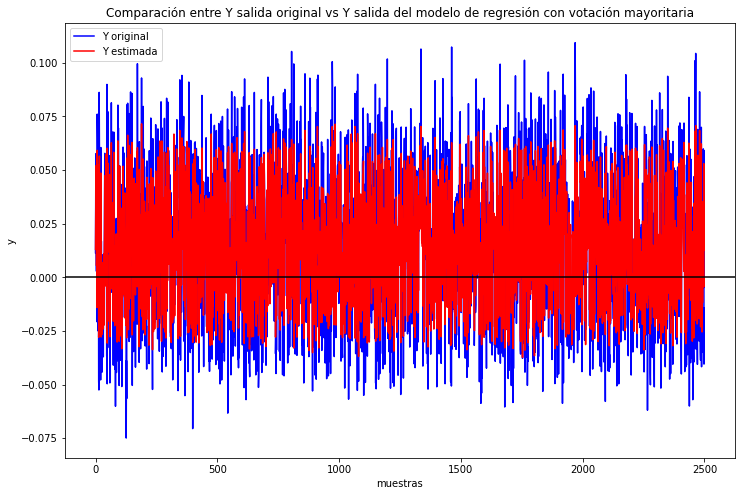

In [ ]:
fig = plt.figure(figsize=(12,8))
line_1 = plt.plot(np.arange(len(Y_Test)), Y_Test, color = 'b', label='Y original') 
line_2 = plt.plot(np.arange(len(Y_Test)), Y_pred, color = 'r', label='Y estimada') 
plt.axhline(0, color="black") # Elegir color de la linea horizontal de referencia
plt.legend()
plt.title('Comparación entre Y salida original vs Y salida del modelo de regresión con votación mayoritaria') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

In [ ]:
Puntaje_1 = Votacion.score(X_Norm_Test, Y_Test) # Validación por puntaje o score
Validacion = cross_val_score(Votacion, X_Norm_Test, Y_Test, cv = 5, scoring = 'neg_mean_squared_error')
# Validación cruzada donde se usa el modelo lineal, las características, las clases o etiquetas, cv es 
# la estrategía de división de datos para hacer validación cruzada. Se recomienda usar cv = 3 fold o doblajes, cv = 5 fold o
# doblajes, cv = 10 fold o doblajes o cv = 20 fold o doblajes.
# scoring es la métrica de evaluación del error del modelo. En este caso, se utiliza el erro cuadrático medio
Puntaje_2 = np.array([Validacion.mean(), Validacion.std()]) # Se calcula la media y desviación estándar de la validación
                                                            # cruzada
print("Puntaje = {:.4f}".format(Puntaje_1))
print("Media = {:.4f}".format(Puntaje_2[0]))
print("Desviación Estándar = {:.15f}".format(Puntaje_2[1]))

Puntaje = 0.8303
Media = -0.0003
Desviación Estándar = 0.000018401158439


In [ ]:
Puntaje_3 = mean_absolute_error(Y_Test, Y_pred) # Se calcula el error promedio absoluto
print("MAE = {:.4f}".format(Puntaje_3))

MAE = 0.0122


## Estrategía 2: Método Stacking para Modelos de Regresión No Lineal

In [ ]:
Modelos = {('Random Forest 1', RF_1), ('Random Forest 2', RF_2)}

In [ ]:
LR = LinearRegression()

In [ ]:
SCR = StackingRegressor(Modelos, final_estimator = LR, cv = 2, n_jobs = 1)

In [ ]:
SCR.fit(X_Norm_Train, Y_Train)

StackingRegressor(cv=2,
                  estimators={('Random Forest 1',
                               RandomForestRegressor(criterion='absolute_error',
                                                     max_depth=7,
                                                     n_estimators=200,
                                                     n_jobs=1)),
                              ('Random Forest 2',
                               RandomForestRegressor(max_depth=10,
                                                     n_estimators=150,
                                                     n_jobs=1))},
                  final_estimator=LinearRegression(), n_jobs=1)

In [ ]:
Y_pred = SCR.predict(X_Norm_Test)

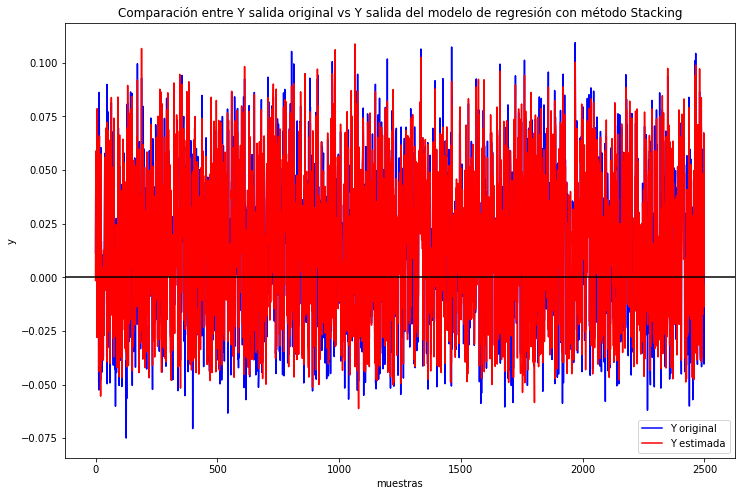

In [ ]:
fig = plt.figure(figsize=(12,8))
line_1 = plt.plot(np.arange(len(Y_Test)), Y_Test, color = 'b', label='Y original') 
line_2 = plt.plot(np.arange(len(Y_Test)), Y_pred, color = 'r', label='Y estimada') 
plt.axhline(0, color="black") # Elegir color de la linea horizontal de referencia
plt.legend()
plt.title('Comparación entre Y salida original vs Y salida del modelo de regresión con método Stacking') # Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

In [ ]:
Puntaje_1 = SCR.score(X_Norm_Test, Y_Test) # Validación por puntaje o score
Validacion = cross_val_score(SCR, X_Norm_Test, Y_Test, cv = 5, scoring = 'neg_mean_squared_error')
# Validación cruzada donde se usa el modelo lineal, las características, las clases o etiquetas, cv es 
# la estrategía de división de datos para hacer validación cruzada. Se recomienda usar cv = 3 fold o doblajes, cv = 5 fold o
# doblajes, cv = 10 fold o doblajes o cv = 20 fold o doblajes.
# scoring es la métrica de evaluación del error del modelo. En este caso, se utiliza el erro cuadrático medio
Puntaje_2 = np.array([Validacion.mean(), Validacion.std()]) # Se calcula la media y desviación estándar de la validación
                                                            # cruzada
print("Puntaje = {:.4f}".format(Puntaje_1))
print("Media = {:.4f}".format(Puntaje_2[0]))
print("Desviación Estándar = {:.15f}".format(Puntaje_2[1]))

Puntaje = 0.8968
Media = -0.0002
Desviación Estándar = 0.000010720464726


In [ ]:
Puntaje_3 = mean_absolute_error(Y_Test, Y_pred) # Se calcula el error promedio absoluto
print("MAE = {:.4f}".format(Puntaje_3))

MAE = 0.0090


## Estrategía 3: Búsqueda de Cuadrículas para Ajustar los Parámetros de un Modelo de Regresión

In [ ]:
metrica = make_scorer(mean_absolute_error)

In [ ]:
RFR = RandomForestRegressor()
Estimadores = [100,150,200,250]
parametros = {'n_estimators': Estimadores, 'criterion': ['absolute_error', 'squared_error']}
GSCVR = GridSearchCV(RFR, param_grid = parametros, scoring = metrica, cv = 3, n_jobs = 1)
GSCVR.fit(X_Norm_Train, Y_Train) 

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'criterion': ['absolute_error', 'squared_error'],
                         'n_estimators': [100, 150, 200, 250]},
             scoring=make_scorer(mean_absolute_error))

In [ ]:
GSCVR.best_estimator_ # Se elige el mejor estimador

RandomForestRegressor(criterion='absolute_error', n_estimators=150)

In [ ]:
Modelo_Elegido = GSCVR.best_estimator_
Y_Pred = Modelo_Elegido.predict(X_Norm_Test)

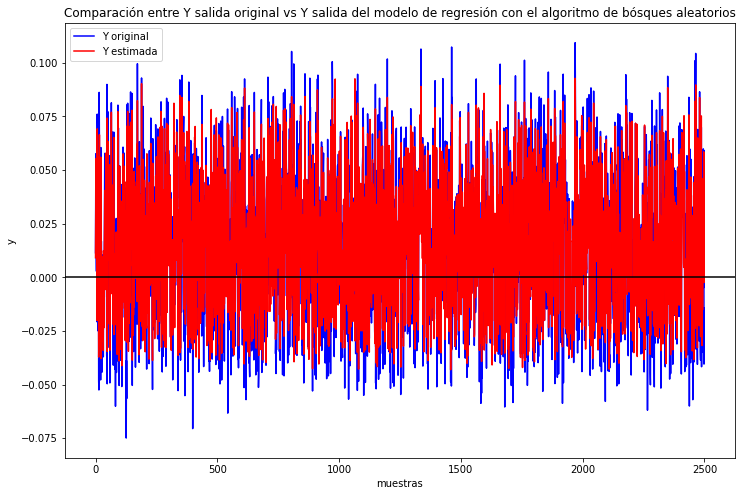

In [ ]:
fig = plt.figure(figsize=(12,8))
line_1 = plt.plot(np.arange(len(Y_Test)), Y_Test, color = 'b', label='Y original') 
line_2 = plt.plot(np.arange(len(Y_Test)), Y_Pred, color = 'r', label='Y estimada') 
plt.axhline(0, color="black") # Elegir color de la linea horizontal de referencia
plt.legend()
plt.title('Comparación entre Y salida original vs Y salida del modelo de regresión con el algoritmo de bósques aleatorios') 
# Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

In [ ]:
Puntaje_1 = Modelo_Elegido.score(X_Norm_Test, Y_Test) # Validación por puntaje o score
Validacion = cross_val_score(Modelo_Elegido, X_Norm_Test, Y_Test, cv = 5, scoring = 'neg_mean_squared_error')
# Validación cruzada donde se usa el modelo lineal, las características, las clases o etiquetas, cv es 
# la estrategía de división de datos para hacer validación cruzada. Se recomienda usar cv = 3 fold o doblajes, cv = 5 fold o
# doblajes, cv = 10 fold o doblajes o cv = 20 fold o doblajes.
# scoring es la métrica de evaluación del error del modelo. En este caso, se utiliza el erro cuadrático medio
Puntaje_2 = np.array([Validacion.mean(), Validacion.std()]) # Se calcula la media y desviación estándar de la validación
                                                            # cruzada
print("Puntaje = {:.4f}".format(Puntaje_1))
print("Media = {:.4f}".format(Puntaje_2[0]))
print("Desviación Estándar = {:.15f}".format(Puntaje_2[1]))

Puntaje = 0.8904
Media = -0.0002
Desviación Estándar = 0.000014724282688


In [ ]:
Puntaje_3 = mean_absolute_error(Y_Test, Y_Pred) # Se calcula el error promedio absoluto
print("MAE = {:.4f}".format(Puntaje_3))

MAE = 0.0093


## Estrategía 4: Caracteristicas Polinómicas + Regresión No Lineal

In [ ]:
Modelo_Polinomico = PolynomialFeatures(degree = 3, interaction_only=True) # Se aplica la regresión polinómica con grado = 3
# interaction_only es una condición donde si es True solamente se producen las interaciones entre características que son la
# mayoría de grados distintos a las caracteristicas de los datos                                                                       

X_poly_entrenamiento = Modelo_Polinomico.fit_transform(X_Norm_Train) # Transformamos los datos de las características de los datos en datos con características polinomiales
X_poly_prueba = Modelo_Polinomico.fit_transform(X_Norm_Test) # Transformamos los datos de las características de los datos en datos con características polinomiales

In [ ]:
RFR = RandomForestRegressor(n_estimators = 100, criterion = 'absolute_error', max_depth = 5, min_samples_split=2, 
                           min_samples_leaf=1, bootstrap=True, n_jobs = 1, ccp_alpha=0.0)

In [ ]:
RFR.fit(X_poly_entrenamiento, Y_Train)

RandomForestRegressor(criterion='absolute_error', max_depth=5, n_jobs=1)

In [ ]:
Y_Pred_Poly = RFR.predict(X_poly_prueba)

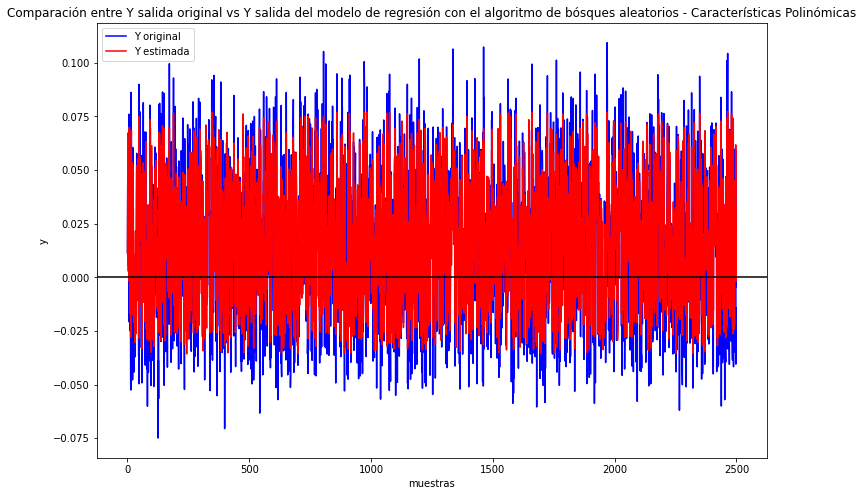

In [ ]:
fig = plt.figure(figsize=(12,8))
line_1 = plt.plot(np.arange(len(Y_Test)), Y_Test, color = 'b', label='Y original') 
line_2 = plt.plot(np.arange(len(Y_Test)), Y_Pred_Poly, color = 'r', label='Y estimada') 
plt.axhline(0, color="black") # Elegir color de la linea horizontal de referencia
plt.legend()
plt.title('Comparación entre Y salida original vs Y salida del modelo de regresión con el algoritmo de bósques aleatorios - Características Polinómicas') 
# Titulo de la gráfica
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y

plt.show() # Mostrar gráfica

In [ ]:
Puntaje_1 = RFR.score(X_poly_prueba, Y_Test) # Validación por puntaje o score
Validacion = cross_val_score(RFR, X_poly_prueba, Y_Test, cv = 2, scoring = 'neg_mean_squared_error')
# Validación cruzada donde se usa el modelo lineal, las características, las clases o etiquetas, cv es 
# la estrategía de división de datos para hacer validación cruzada. Se recomienda usar cv = 3 fold o doblajes, cv = 5 fold o
# doblajes, cv = 10 fold o doblajes o cv = 20 fold o doblajes.
# scoring es la métrica de evaluación del error del modelo. En este caso, se utiliza el erro cuadrático medio
Puntaje_2 = np.array([Validacion.mean(), Validacion.std()]) # Se calcula la media y desviación estándar de la validación
                                                            # cruzada
print("Puntaje = {:.4f}".format(Puntaje_1))
print("Media = {:.4f}".format(Puntaje_2[0]))
print("Desviación Estándar = {:.15f}".format(Puntaje_2[1]))

Puntaje = 0.8151
Media = -0.0003
Desviación Estándar = 0.000006327978536


In [ ]:
Puntaje_3 = mean_absolute_error(Y_Test, Y_Pred_Poly) # Se calcula el error promedio absoluto
print("MAE = {:.4f}".format(Puntaje_3))

MAE = 0.0124
